#Aula 2: Médias, Medianas e Visualização de Dados.
##Introdução

Nesta aula vamos estudar: 
* Com mais profundidade as técnicas de centralidade. 
* Conhecer algumas boas práticas de visualização de dados.
* O famoso Boxplot.

Vamos relembrar como alguns dados estavam configurados na Aula anterior

In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Separando informações específicas de um DataFrame

Nessa Aula precisamos segregar os gêneros de cada um dos filmes contidos na base de dados do Movie Lens.

Como visto acima, temos os títulos e uma coluna com os respectivos _gêneros_, todos em uma única coluna, cada label é separada com um | como (Adventure|Children|Fantasy) sendo do tipo _string_.

Para solucionar nosso problema precisamos separar cada um dos gêneros para então realizar a contagem. Existe várias formas de resolver este problema, mas como estamos usando o pandas já temos algo para facilitar nosso processamento dos dados. 

Vamos aplicar o método e logo em seguida explicar a saída geranda.

In [0]:
#Separando a coluna generos do resto
filmes["generos"].str.get_dummies('|')

Como você percebeu a saída é um DataFrame, cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero único virou uma coluna no DF). O que você deve estar se perguntando é como os valores 0/1 são preenchidos?.

Para explicar, vamos pegar os gêneros do filme **Jumanji**, (Adventure|Children|Fantasy): 
* Na coluna dos repectivos gêneros o valor será 1. 
* Para todos os outros gêneros, que não são gêneros do filme Jumanji, vale 0. 

Em suma, se o nome da coluna pertence a algum gêreno do respectivo filme, o valor será 1 caso contrário 0.

Até aqui resolvemos uma parte do problema, agora precisamo somar quantos 1 cada coluna tem.

In [0]:
#Somandos os "1" de cada tabela
#OBS: É pra somar, nao contar, pq isso iria incluiria os zero
filmes["generos"].str.get_dummies('|').sum()

Ótimo, resolvemos o desafio e agora temos quantas vezes cada gênero aparece. Assim, fica fácil de reponder perguntas como: 
* Qual o gênero com mais filmes produzidos? 
* Qual o com menos? 
* Qual o segundo?

OBS: Lembrando que o dado está restrito as informações do movie lens.

Se você tentou reponder, deve ter notado que não foi tão fácil assim, as informações não estão ordenadas e toda hora você precisa percorrer a tabela para fazer comparações. Nós podemos melhorar isso ordenando as informações.


In [0]:
#Ordenando as informações em ordem decrescente com base no valor
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

##Plotando o Gráfico

Conseguimos responder as perguntas anteriores sem grandes dificuldades. Mas ainda podemos melhorar a forma de expor nossa informação usando gráficos.

Porem, aprendemos que não adianta só plotar uma imagem, é preciso que faça sentido para a informação que queremos analisar, um gráfico de linhas, por exemplo, não faz muito sentido.

Tentemos o famoso grafico de pizza:

In [0]:
#Importamos a biblioteca matplotlib mais uma vez e usamos o grafico de pizza
import matplotlib.pyplot as plt
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='pie', 
                                                                               title='Categorias de filmes e suas presenças relativas', 
                                                                               figsize=(8,8))
plt.show()

Algo que fica evidente neste gráfico é que _Drama, Comedy, Thriller, e Action_ tem proporções "grandes", mas qualquer outra análise fica complicada. Porque?
* Primeiro, as cores começa a se repetir e isso não é o ideial.
* Segundo, repare nos gêneros com menos filmes, consegue tirar alguma informação de lá? Está muito difícil de analisar.
* Terceiro, vamos tentar comparar _Thriller e Action_, qual está presente em mais filmes? Difícil responder. Quando estamos trabalhando com gráficos desse tipo fazemos comparações entre área, mas nós humanos não somos bons nisso.
* Por último, o importante de uma visualização é que ela seja "transparente" ao intuíto de nossa análise. Ou seja, estamos querendo analisar as informações de **quantidade**, comparando as labels de forma geral e evidênciando de maneira **clara** as diferenças entre elas (proporções).

Portanto, o gráfico de pizza não torna as comparações claras, sendo assim uma má ideia. Vamos construir juntos uma solução mais adequada!

In [0]:
#Mudamos da pizza para a barra, alterando apenas o parâmetro kind do método.
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar', 
                                                                               title='Filmes por categoria', 
                                                                               figsize=(8,8))
plt.show()

Conclusão: Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre _Drama e Comedy_, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar _Thriller e Action_, agora a comparação ficou **fácil** e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados **melhorou muito** com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tornar evidente essa informação vamos utilizar algo "semelhante" a um mapa de calor.

##Plotando Gráfico de Gênero de Filmes com Seaborn

Para plotar o gráfico com um mapa de calor como queremos, fazemos o seguinte:
* Primeiro, não plotamos mais a imagem com plot do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o **seaborn**.
* Segundo, chamamos o **barplot** do seaborn, adicionando uma paleta de cores (**palette**) com efeito de mapa de calor no parâmetro do método responsavel pela paleta de cores.
* Terceiro, também adicionamos um método especifico para que todos os gráficos tenham a **linha de grade do eixo X evidênte**, facilitando a comparação entre as barras.
* Por último, mudamos o **tamanho da imagem**[link text](https://) com o figsize do método figure(). Assim, temos um gráfico com muitas informações e agradável de analisar.

Veja abaixo:



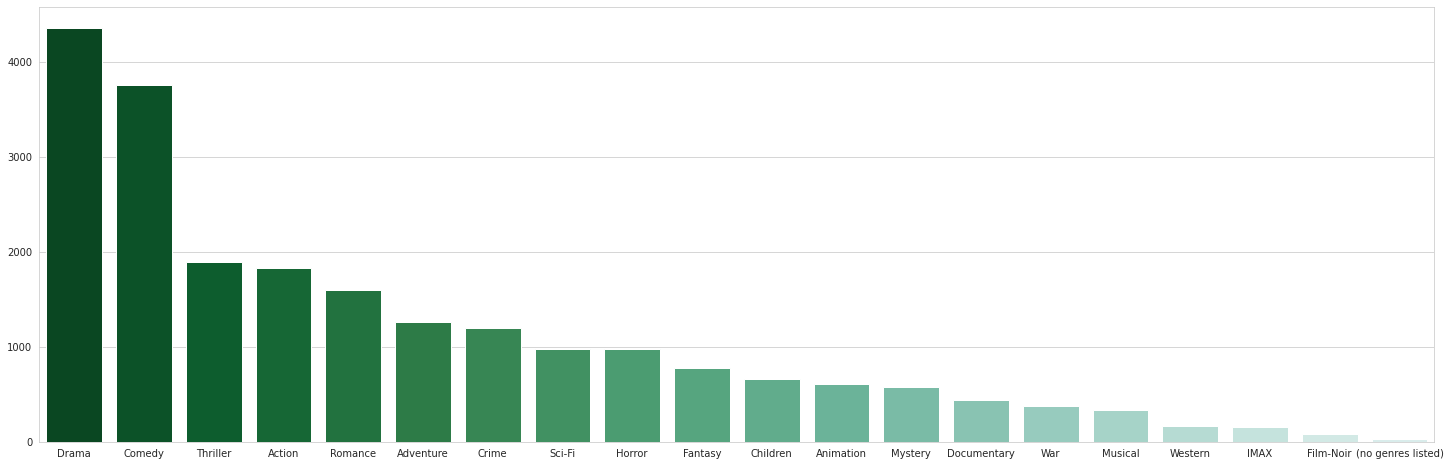

In [0]:
#Importando biblioteca seaborn
import seaborn as sns
#Deixando a linha de grade do eixo x evidente
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
#Mudamos o tamanho da imagem
plt.figure(figsize=(25,8))
#Chamando o barplot do seabon, no paramentro informamos o que será visualizado nos eixos 
#e adicionamos a paletra de cores com efeito de mapa de calor
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Conseguimos analisar e tirar conclusões trabalhando com a visualização dos _gêneros_ dos filmes. Agora vamos utilizar visualizações para entender melhor as _notas_ de um filme.


##Plotando e Analisando Gráficos de Notas Medias de Filmes com Pandas

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas. Na Aula1 calculamos as notas médias por filmes, vamos chamar aqui e dar uma olhada no resultado.


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.head()

Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das notas para comparar alguns filmes. Por exemplo, Toy Story e Jumanji:

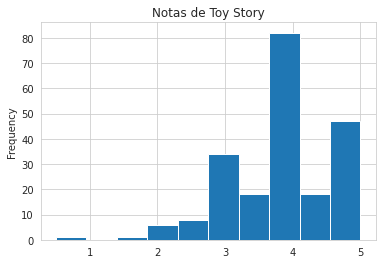

In [0]:
#No eixo x está o tipo de notas e o eixo y está numero de ocorrencias desse tipo de nota
notas_do_filme1 = avaliacoes.query("filmeId==1")["nota"].plot(kind='hist', title='Notas de Toy Story')


In [0]:
notas_do_filme2 = avaliacoes.query("filmeId==2")["nota"].plot(kind='hist', title='Notas de Jumanji')



Observamos que:
* ToyStory e Jumanji tem **médias relativamente próximas** mas com **comportamento de notas diferentes**. 
* Então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados.

Isso acontece porque olhamos apenas para as médias das notas mas conseguimos evidênciar a desigualdade de distribuição que havia entre as notas.

Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a _mediana_.

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias:

In [0]:
filmes_com_media.sort_values("nota_media", ascending=False)[2490:2500]

Bom, ordenando os filmes pela **nota média e fatiando os dados** entre [2490 e 2500], temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime Wizard of Oz (filmeId = 919) e Little Miss Sunshine (filmeId = 46578).

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira _função_, assim passamos apenas o filme_Id como parâmetro e temos as informações desejadas. A função plot, além de gerar o histograma também retornará algumas estatísticas. 



In [0]:
def plot_filme(filme_id):
  notas_do_filme = avaliacoes.query("filmeId=={}" .format(filme_id))["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe().round(2)

In [0]:
#Agora chamemos a função pra Wizard of Oz
plot_filme(919)

In [0]:
#Agora chamemos a função pra Little Miss Sunshine
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes: 
* Analisando os histogramas vemos que muitas pessoas realmente amam Wizard of Oz (notas 5), mas também temos pessoas que não gostam de formal alguma do filme (notas 1). 
* Quando comparamos com a histograma de Little Miss Sunshine, percebemos que os resultados se concentram entrem valores medianos (notas 2.5 - 4).

O que confirma nossa análise aqui é comparar os 25%, 50% e 75%:
* 50% é o valor da mediana, e ambos filmes tem mesma mediana.
* 25% e 75% são diferentes. Se você lembra lá da estatística esses são os 1° 2° e 3° quartis.


##Plotando Graficos com Boxplot no Pandas e Analisando 

Mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados, mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor que o histograma, o gráfico que nos ajuda neste caso é o Boxplot. Vamos adaptar nossa função para conseguir plotar o **boxplot** e interpretá-lo.


In [0]:
def plot2_filme(filme_id):
  notas_do_filme = avaliacoes.query("filmeId=={}" .format(filme_id))["nota"]
  notas_do_filme.plot.box()
  return notas_do_filme.describe()

In [0]:
#Chamemos a função de boxplot pra Wizard of Oz
plot2_filme(919)

É simples criar criar um boxplot com o pandas, agora o que precisamos fazer é interpretar este gráfico focando na "caixa":
* A linha verde que divide a "caixa" em dois, é a mediana (compare com as estatísticas geradas pelo describe()). 
* A parte superior da caixa é o 3° Quartil (75%). 
* A parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao **ponto de máximo e mínimo, mas nem sempre será assim**. Isso acontece porque esse limite inferior e superior são calculados e dependem de Q1 e Q3, respectivamente. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.


In [0]:
plot2_filme(46578)

Diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso é essa bolinha localizada em y = 1. A "bolinha" chamamos de valor **discrepante**, por ir além dos limites inferior e superior (chamamos na aula de outliers, existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Agora, comparando os boxplot dos dois filmes, fica muito mais evidente as diferenças entre eles, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto: Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas. 

Vamos juntas esses dois boxplot em uma imagem só. Veja como podemos fazer isso usando o **Seaborn**, para aprendermos outra forma de plotar boxplot!

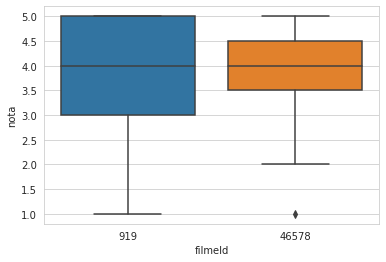

In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [919,46578]"), x ="filmeId", y="nota")

Chamamos o metodo acima passando três parâmetros: 
* O primeiro é um DataFrame das notas dos filmes Wizard of Oz e Little Miss Sunshine (tambem usamos o .query() para selecionar os dados). 
* X é o Id do filme. 
* Y as respectivas notas. 

Agora conseguimos comparar as notas dos filmes de forma muito mais clara.

###Desafio 1
Rotacionar os thicks (nesse caso, os nomes dos generos) para a vertical no gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

In [0]:
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(17,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
#Metodo para rotacionar o ticks
plt.xticks(rotation=45)
plt.show()

###Desafio 2
Encontrar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(filme_id) para plotar.

In [0]:
plot_filme(924) # 2001: A Space Odyssey (1968)

In [0]:
plot_filme(55820) # No Country for Old Men (2007)

In [0]:
plot_filme(2150) # Gods Must Be Crazy, The (1980)

###Desafio 3

Criar o boxplot dos 10 filmes com mais votos (contados). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
#Gerando o dataframe com a coluna total de votos
total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_votos'})
#Fazendo o top 10 e separando os titulos e ids
top_10_votos_por_filme = filmes_com_media_e_votos.sort_values(by='total_votos', ascending=False).head(10)
top_10_votos_por_filme_titulo = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_id = top_10_votos_por_filme['filmeId'].to_list()
#Escolhendo o tamanho do plot
plt.figure(figsize=(18, 8))
#Plotando o grafico boxplot com base nos id
ax = sns.boxplot(data = avaliacoes.query("filmeId in {}" .format(top_10_votos_por_filme_id)), x = 'filmeId', y = 'nota')
#Substituito o numero do id no eixo x pelo titulo dos filmes
ax.set_xticklabels(top_10_votos_por_filme_titulo, fontsize=12)
#Rotacionando os titulos
plt.xticks(rotation=90)
#Mundando o nome dos eixos x e y
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)

plt.show()

###Desafio 4

Configurar a visualização do boxplot gerado pelo Seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

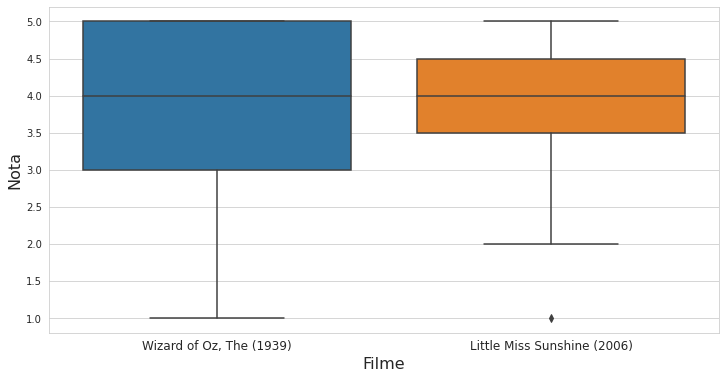

In [0]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(data = avaliacoes.query("filmeId in [919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [919,46578]")['titulo'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

###Desafio 5

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def explora_filme(filme_id):
    filme = filmes.query('filmeId == {}' .format(filme_id))
    notas = avaliacoes.query('filmeId == {}' .format(filme_id))['nota']
    
    print('Filme: {}' .format(filme.iloc[0, 1]))
    print()
    print('Moda: {}' .format(notas.mode().values))    
    print('Média: {}' .format(notas.mean()))
    print('Mediana: {}' .format(notas.median()))
    print('------------')

In [0]:
#Notas proximas de 0.5
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

In [0]:
#Notas proximas de 3
explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

In [0]:
#Notas proximas de 5
explora_filme(177593)
explora_filme(1178)
explora_filme(4334)

###Desafio 6

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [0]:
pulp_fiction = avaliacoes.query('filmeId == 296')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax = axes[0])
pulp_fiction.plot(kind='box', ax = axes[1])

plt.show()

###Desafio 7

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

In [0]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()